# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [51]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [4]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: ** A higher averave number of rooms (RM) could mean that the houses are bigger in size. Which in turn could mean that MEDV increases as people are willing to pay more money for more room. --> MEDV is likely to increase

A higher percentage of 'lower class' homeowners in the neighborhood speaks more for a decrease of the MEDV. Compared to a 'middle' or 'upper class' neighorhood 'lower class' people would have less available money to spend for housing. --> MEDV is likely to decrease

A higher ratio of students to teachers (PTRATIO) would also speak for a decrease in housing. Many families are willing to pay a premium for housing in a good school district. The less students a teacher has to teach the more time each child gets attention the better the school. A low student–teacher ratio is often used as a selling point to those choosing schools for tertiary education. On the other hand, high student–teacher ratio is often cited for criticizing proportionately underfunded schools or school systems, or as evidence of the need for legislative change or more funding for education (https://en.wikipedia.org/wiki/Student%E2%80%93teacher_ratio). --> MEDV is likely to increase

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [40]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [10]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

0.922855648536
Model has a coefficient of determination, R^2, of 0.923.


**Answer:** By jsut looking at the data the spreadsheet we can tell that the results are not perfect but still capture the variations in a way. It shows a min diviation of 0.1 (2.1 vs. 2.0) and a max diviation of 1.1 (5.3 vs. 4.2). 

Applying the performance metric of the r^2 score shows a similar result. R^2 is a number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable (https://en.wikipedia.org/wiki/Coefficient_of_determination). Best possible score is 1.0. 

The model achieves a score of 0.923. This seems pretty good as 92.3% of variances can be predicted from the features.  

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [44]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 21)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** When we fit a "model" to a set of training data we want to be able to make reliable predictions on general untrained data. One benefit to splitting a dataset into some ratio of training and testing subsets is to have an independent dataset available that allows for an evaluation of the performance of the classifier/regression against untrained data. Using this set of data kept for testing, we can measure on this testing set which points were accurately classified, and which were not.

Having training and testing data in separate sets can be used as check on overfitting. An overfitted model describes random error or noise instead of the underlying relationship. Overfitting occurs when a model is excessively complex, such as having too many parameters relative to the number of observations. A model that has been overfit has poor predictive performance, as it overreacts to minor fluctuations in the training data (https://en.wikipedia.org/wiki/Overfitting). Having a separate set of data to test against can help pervent overfitting. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

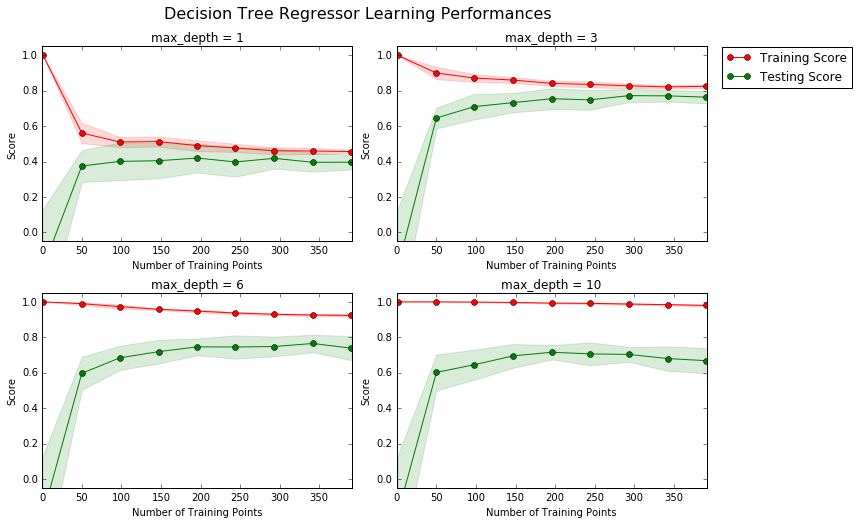

In [16]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

Graph 3

Max-depth: 6

The max-depth critera defines the maximum depth of the tree. Without the manual stopping critera nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
In the example above with max_depth = 6 the training score starts out with a score close to 1 for few training points (0-25) and decreases slowly to a score of about 0.9 for about 250 training points. It seems that the score plateaus at this score for higher number of training points. 

The testing score increases steeply to 0.6 for a number of training points up to 50 and continous to grow slightly for the range between 50 (about 0.65) and 200 (about 0.75)  training points. The score seems to plateau afterwards with tiny variances (+/- about 0.2) for the rage thereafter with a slight tendency to decrease at trainging points beyond 350.    

Both scores show an almost constant score for an amonut of training points beyond 250. The curves converge at this point. The testing score even shows a tendency to decrease with numbers beyond 350. Therefore, adding more training points beyond that points would not benefit the model.


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

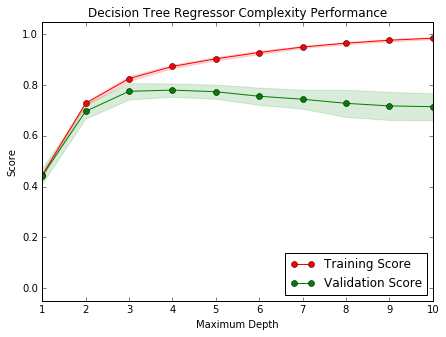

In [17]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
With a max_depth of 1 the model suffers from a high bias.
The bias is error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting) (https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff). The algorithm in the example above shows validation and training scores of 0.45 for a max_depth of 1. This indicates that the algorithm is generalizing too much and is not perceptive to the features enough. 

With a max_depth of 10 the model seems to suffer from a high variance. The variance is error from sensitivity to small fluctuations in the training set. High variance can cause overfitting: modeling the random noise in the training data, rather than the intended outputs (https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff). The graph shows a high discrepance between training score (about 1) and validation score (about 0.7). This indicates that the model recognizes the special noise in the training data rather than making general enough predictions that are relevant for the validation data-set or any future un-seen data. 



### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

The bias–variance tradeoff (or dilemma) is the problem of simultaneously minimizing two sources of error that prevent supervised learning algorithms from generalizing beyond their training set (https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff): You want to have an  algorithm that has the bias to generalize but is also perceptive to data. The validation score in the graph reaches the maximum for a max_depth of 4. This indicates that this point seems to be the optimal balance between bias and variance.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** Grid search technique is a way of systematically working through multiple possible combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance (https://classroom.udacity.com/courses/ud120/lessons/2960698751/concepts/30561085470923#). 

Parameters of an algorithm can have major influence on the performance of an algorithm as we saw for example in the decision tree regressor curves above in regards to the max-depth parameter. There the performance of a single parameter setting resultet in a score between 0.4 for max_depth=1 and almost 0.8 for max-depth=3. Grid search in this example would use a set of pre-defined parameters for the max_depth value (like 1-10) and test each parameter. This could be seen as grid of 1xn parameters to be tested. The test with the highest score can be taken to achieve the best performance and to detect and avoid errors like over- or underfitting.   


A more complex example would be the SVM algorithm which supports the parameters 'kernel' and 'C'. In order to optimize the result we'd have to test a test a 'grid' of   possible choices for those parameters (e.g. Kernel: linear vs. 'rbf' and C: range 1 - 10). We'd create a grid of 2x10 possible combinations to test. The grid search technique does this test for us and returns the combination with the best performance metric typically measured by cross-validation on a separate training set. Grid search can be seen as brute force attac to determine the best possible combination of parameters. 

By systematically training an classifier with different parameter settings and measuring the performance on unseen data grid search technique helps to optimize a learning algorithm. 

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

Cross-validation is a technique to evaluate predictive models by partitioning the original data sample into a training set to train the model, and a test set to evaluate it. 

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once (http://www.openml.org/a/estimation-procedures/1).

The advantage of using k-fold cross validation alongside the grid search is to maximize not only the model for one set but also optimize for the use with new / unseen data. K-fold maximises the use of the data available for training and testing purposes. In each of the k cases we have k-1 training and one previously unseen testing data set. The combination of grid search - which iterates through different parameter settings - and k-fold cross validation - which iterates through different training/testing data combinations - allows to maximize the performance while making sure that the algorithm can react best on unseen data and is not overfittet to a special set of training/testing data.  




### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [45]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor 
from sklearn.grid_search import GridSearchCV



def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
  


    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth":range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [46]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **Parameter 

The grid search returns an optimal parameter for 'max_depth' of 4.  This is similar to the result guessed for the optimal model by looking at the graph.



### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [47]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $407,400.00
Predicted selling price for Client 2's home: $230,508.51
Predicted selling price for Client 3's home: $888,720.00


**Answer: **
The algorithm predicts house prices based on the given features of 407k, 231k and 889k. 
These prices seem to be in the general range of prices seen in the area where we saw min price of 105k and max price of 1,025k. Therefore the suggested prices are not per se unreasonable.

The houses also seem to be reasonable priced compared to each other giving their feature set. We discussed earlier that prices are determined by size (more rooms tend to have higher prices), the neighborhood poverty level (lower results likely in higher prices) an the student-teacher ratio (lower ratio siggests higher prices).

The house of client 3 has the most rooms, the lowest poverty level and the best student-teacher ratio. It is suggested to be priced well above the average (range of mean(454k) + 3 std (165k)). Giving that the house has 8 rooms and scores hig among the other features this might still be reasonable. The house of client 1 scores around the average (range of mean - 1 std). It scores better than the house of client 2 and worst than the house of client 3 in all feature categories. Therefore the suggested price seems reasonable. The house of client 2 scores worst of all in all three feature categories. It is suggested at a price well below the average (range of mean - 2 std) which also is reasonable giving the lowest scores in the feature set.
 

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [50]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

How relevant today is data that was collected from 1978?

Time seems to be a major factor influencing the accuracy of the underliying data for any prediction. It's roughly 40 years ago that the data was collected. During this time we have seen a lot of changes to the society that influenced the way that people live e.g. urbanisation, increase in mobility / public transportation and respectively how much money they are able and willing to spend to live. We also saw ups and downs in the general economy that influenced house prices (e.g. the financial crises of 2008). Areas might have changed. Inflation had an influence on house prices and so can do many other factors. However, the features looked at in this model still seem very reasonable as a mean to compare house prices of houses in general as the example above showed. Therefore, while the numbers resulting fromt he prediction might not be valid anymore the data might still be relevant in giving a rough idea of how to compare houses in different areas or of differnt sizes. 

Are the features present in the data sufficient to describe a home?

We got to reasonalbe results by using the feature set and therefore the features seem to be sufficient to describe a home. This does not mean that there are not likely way to improve the model by using a broader or more accurate feature set (size vs. rooms, or including year of construction).

Is the model robust enough to make consistent predictions?
The fit_model function above showed for the ten runs with different training and testing sets a difference in predictions of about 70k while prices range roughly around 400k. This spread in the predictions for a specific clients based on the data it's trained on seems to be pretty significant. The model does not seem to be robust enought to truely make consistent predictions.

Would data collected in an urban city like Boston be applicable in a rural city?

In general prices for homes are constructed in the same way in urban cities and rural cities. People look at features like size, age, rooms, area. The general model and feature set might therefore valid in both areas.  

However, the importance of each feature on the price of the house might highly different between rural and metropolitan aeras. Rural areas will most likely have larger lots due to lower land prices so that room will have a different value in the city than in rural areas. People also might not have a chance to select houses based factors like the student-teacher ratio as easily as in a urban area as there are likely much fewer schools available. On the other side other factors might be more imporant like access to general infrastructure (e.g. fast internet connection, distance to shopping centers). Those factors might be taken for granted in urban areas. Therefore it seems unlikely that the data collected in Boston would be applicable in rural areas. 


Should the constructed model be used in a real-world setting.

The answer to the question depends on the goals of the real-world setting. It seems that the age of data, limitations in the area where it can be generalized to and the accuracy would suggest to use it with the goal to accurately predict house prices. Using the data to train ML students seems to be a very valid real-word setting for the data though. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.